In [1]:
"""
Notebook version of the new clustering algorithm
"""

'\nNotebook version of the new clustering algorithm\n'

In [1]:
from yuval_module.paper_clusterer import PaperClusterer
from yuval_module.paper_source import PaperSource
import sys
import pandas as pd
import numpy as np


%matplotlib inline

In [2]:
def load_dataset(set_name):
    ps=PaperSource()
    ps.load_dataset(set_name)
    return ps

In [9]:
def get_res_papers(ps,author_name):
    df=ps.get_dataset()
    return df[df['last_author_name']==author_name]

In [4]:
ps=load_dataset('enriched_labeled')

In [16]:
df=get_res_papers(ps,'Szeszko, PR')

In [17]:
df

,Unnamed: 0,pmid,PROJECT_NUMBER,FY,PI_IDS,PI_NAMEs,last_author_name,doi,journal_name,language,last_author,last_author_country,last_author_email,last_author_id,last_author_inst,last_author_inst_type,mesh,mesh_major,pub_year,title
95211,72195,19145224,M01RR018535,2009,1988051;,"SZESZKO, PHILIP R;","Szeszko, PR",NaN,Neuropsychopharmacology : official publication...,eng,NaN,United States,NaN,1954110.0,Zucker Hillside Hospital,Healthcare,"['Adult', 'Anisotropy', 'Diffusion Magnetic Re...","['Bipolar Disorder/pathology', 'Cerebellum/pat...",2009.0,A voxel-based diffusion tensor imaging study o...
95301,72198,18570200,M01RR018535,2009,1988051;,"SZESZKO, PHILIP R;","Szeszko, PR",10.1002/hbm.20595,Human brain mapping,eng,NaN,United States,NaN,1954110.0,Zucker Hillside Hospital,Healthcare,"['Adult', 'Analysis of Variance', 'Brain Mappi...","['Schizophrenia/pathology', 'Thalamus/pathology']",2009.0,Volumetric and shape analysis of the thalamus ...
95378,72229,28348381,M01RR018535,2009,1988051;,"SZESZKO, PHILIP R;","Szeszko, PR",NaN,Molecular psychiatry,eng,{'affiliation': 'James J. Peters VA Medical Ce...,United States,NaN,NaN,James J Peters VA Medical Center,Healthcare,"['Adult', 'Antipsychotic Agents/therapeutic us...",['Diffusion Magnetic Resonance Imaging/methods...,2018.0,Greater extracellular free-water in first-epis...
95379,72228,29744804,R01MH076995,2009,1988051;,"SZESZKO, PHILIP R;","Szeszko, PR",NaN,Brain imaging and behavior,eng,{'affiliation': 'James J. Peters VA Medical Ce...,United States,NaN,1654036.0,James J Peters VA Medical Center,Healthcare,"['Adult', 'Brief Psychiatric Rating Scale', 'D...","['Antipsychotic Agents/therapeutic use', 'Fron...",2019.0,Frontal lobe functioning during a simple respo...
95389,72240,25567423,M01RR018535,2009,1988051;,"SZESZKO, PHILIP R;","Szeszko, PR",NaN,Neuropsychopharmacology : official publication...,eng,{'affiliation': '1] Center for Psychiatric Neu...,United States,NaN,1954110.0,Zucker Hillside Hospital,Healthcare,"['Adolescent', 'Adult', 'Antipsychotic Agents'...","['Cerebral Cortex/blood supply', 'Rest']",2015.0,Abnormal resting state FMRI activity predicts ...
95421,72261,25532972,R01MH076995,2009,1988051;,"SZESZKO, PHILIP R;","Szeszko, PR",NaN,Bipolar disorders,eng,{'affiliation': 'The Feinstein Institute for M...,United States,NaN,1710365.0,Northwell Health,Healthcare,"['Adolescent', 'Adult', 'Age Factors', 'Child'...","['Bipolar Disorder/diagnosis', 'Corpus Callosu...",2015.0,Age-associated alterations in corpus callosum ...
95422,72257,25081550,R01MH076995,2009,1988051;,"SZESZKO, PHILIP R;","Szeszko, PR",NaN,Brain structure & function,eng,{'affiliation': 'Center for Psychiatric Neuros...,United States,NaN,1550922.0,Albert Einstein College of Medicine,Education,"['Adult', 'Diffusion Magnetic Resonance Imagin...",['Hippocampus/anatomy & histology'],2015.0,Delineation of hippocampal subregions using T1...
95423,72253,25765593,M01RR018535,2009,1988051;,"SZESZKO, PHILIP R;","Szeszko, PR",NaN,Progress in neuro-psychopharmacology & biologi...,eng,{'affiliation': 'Feinstein Institute for Medic...,United States,NaN,1954110.0,Zucker Hillside Hospital,Healthcare,"['Adolescent', 'Brain/blood supply', 'Case-Con...","['Autistic Disorder/pathology', 'Brain Mapping...",2015.0,Neural systems mediating decision-making and r...


In [16]:
def get_clusters(row):
    pmid_df = get_papers(row["last_author_name"])
    pmid_list=pmid_df.pmid.tolist()[:1]
    paper_clusterer=PaperClusterer(eps=1.27)
    res_clusters, cluster_dfs=paper_clusterer.infer_paper_author_data(pmid_list)
    return cluster_dfs[0].sort_values(["cluster"])

In [8]:
def get_out_path(row):
    cur_name=row["last_author_name"]
    fields=cur_name.split(", ")
    return "/home/ubuntu/data/{}_{}.csv".format(fields[0], fields[1])

In [19]:
# def get_file_name(author_name):
#     author_name=author_name.replace(',',' ')
#     author_rebuilt='_'.join(author_name.split(' '))
#     return ''.join(["/home/ubuntu/data/", author_rebuilt, ".csv"])
# #%%
def main(author_list_path):
    authors_df=pd.read_csv(author_list_path).rename(columns={"name":"last_author_name"})
    print(authors_df)
    
    for _idx, row in authors_df.iloc[2:].iterrows():
        print(row)
        cluster_df=get_clusters(row)
        out_path=get_out_path(row)
        cluster_df.to_csv(out_path, index=False, columns=["pmid", "cluster", "last_author_inst", "last_author_forename","pub_year","last_author_name"])
        
#         #pmid_df=pd.read_csv(list_path, dtype=str, usecols=["PMID"]).rename(columns={"PMID":"Highlight"})
#         #print(pmid_df.info())
#         #limit=min(limit, len(pmid_df))
#         #pmid_list=pmid_df.Highlight.tolist()[offset:offset+limit]
#         pmid_list=pmid_df.pmid.tolist()[:2]
#         paper_clusterer=PaperClusterer(eps=1.27)
#         res_clusters, cluster_dfs=paper_clusterer.infer_paper_author_data(pmid_list)
    
#     #res_clusters, cluster_dfs=paper_clusterer.infer_paper_author_data(pmid_list).sort_values(["rownum"])
#         return res_clusters, cluster_dfs
    #out_path="/home/ubuntu/data/rp_40000_authors.tsv"
    #out_path="/home/ubuntu/data/test_forenames_res.tsv"

    #res_clusters.to_csv(out_path, index=False, sep='\t')


    id         last_author_name            last_name          fore_name  \
0    1                Hecht, JR               Hecht      Joel Randolph    
1    2             Gottlieb, PA     Peter A Gottlieb              Peter   
2    3                 Cohan, P                Cohan             Pejman   
3    4                 Buse, JB                 Buse               John   
4    5                Fuchs, CS                Fuchs            Charles   
5    6            D'Alessio, DA            D’Alessio              David   
6    7               Benson, AB               Benson                Al    
7    8                Taylor, P               Taylor             Peter    
8    9            Rauh-Hain, JA            Rauh-Hain               Jose   
9   10                    Li, Y                   Li                Yan   
10  11  Escalada San Martín, FJ  Escalada San Martín  Francisco Javier    

   initials         field        Comment  
0        JR      Oncology            NaN  
1        PA  

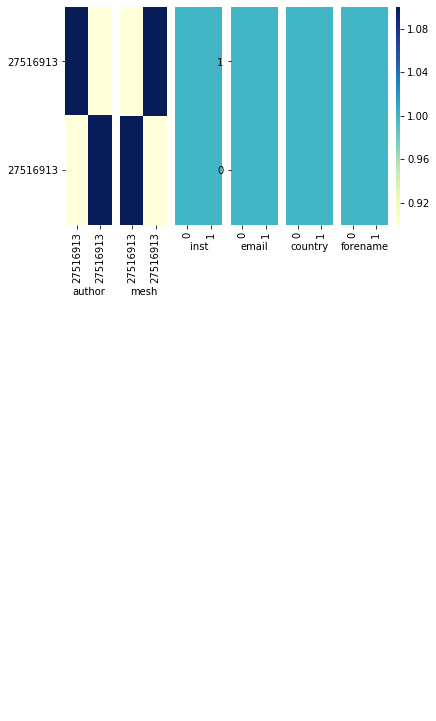

sim matrices shapes for author and mesh:
correlations:
          author  mesh  inst  email  country  forename
author       1.0   1.0   NaN    NaN      NaN       NaN
mesh         1.0   1.0   NaN    NaN      NaN       NaN
inst         NaN   NaN   NaN    NaN      NaN       NaN
email        NaN   NaN   NaN    NaN      NaN       NaN
country      NaN   NaN   NaN    NaN      NaN       NaN
forename     NaN   NaN   NaN    NaN      NaN       NaN
similarity statistics:
        author     mesh  inst  email  country  forename
count  4.00000  4.00000   4.0    4.0      4.0       4.0
mean   0.50000  0.50000   0.5    1.0      1.0       1.0
std    0.57735  0.57735   0.0    0.0      0.0       0.0
min    0.00000  0.00000   0.5    1.0      1.0       1.0
25%    0.00000  0.00000   0.5    1.0      1.0       1.0
50%    0.50000  0.50000   0.5    1.0      1.0       1.0
75%    1.00000  1.00000   0.5    1.0      1.0       1.0
max    1.00000  1.00000   0.5    1.0      1.0       1.0
[(2, 2), (2, 2), (2, 2), (2, 2), 

finished building country inst dict
found 1 publications
hit_df retrieved fields:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 13 columns):
authors                    1 non-null object
last_author_affiliation    1 non-null object
last_author_forename       1 non-null object
last_author_country        1 non-null object
last_author_email          1 non-null object
last_author_id             1 non-null object
last_author_inst           1 non-null object
last_author_inst_type      1 non-null object
last_author_name           1 non-null object
mesh                       1 non-null object
mesh_major                 1 non-null object
pmid                       1 non-null object
pub_year                   1 non-null int64
dtypes: int64(1), object(12)
memory usage: 184.0+ bytes
None
                                             authors  \
0  [{'forename': 'John B', 'affiliation': 'Divisi...   

                             last_author_affiliation last_a

        pmid    last_author_email        email_clean
25  19667580                  NaN                   
7   11913675                  NaN                   
12  10523468  [jbuse@med.unc.edu]  jbuse@med.unc.edu
0   12716828  [jbuse@med.unc.edu]  jbuse@med.unc.edu
24  29657859                  NaN                   
23  30035272                  NaN                   
22  30851070                  NaN                   
20  30291106  [jbuse@med.unc.edu]  jbuse@med.unc.edu
19  30288571                  NaN                   
28  27143035                  NaN                   
11  10682172                  NaN                   
14  30899969                  NaN                   
6   18392805  [jbuse@med.unc.edu]  jbuse@med.unc.edu
5   21263434  [jbuse@med.unc.edu]  jbuse@med.unc.edu
4   11183423                  NaN                   
3   18560400  [jbuse@med.unc.edu]  jbuse@med.unc.edu
2   25220193  [jbuse@med.unc.edu]  jbuse@med.unc.edu
1   10189565   [buse@med.unc.edu]   buse@med.u

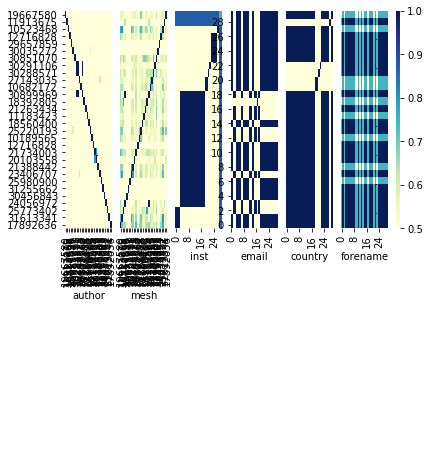

sim matrices shapes for author and mesh:
correlations:
            author      mesh      inst     email   country  forename
author    1.000000  0.732560  0.249209  0.139067  0.133349  0.037606
mesh      0.732560  1.000000  0.072663  0.068042  0.132285 -0.150368
inst      0.249209  0.072663  1.000000 -0.044428  0.324258  0.056494
email     0.139067  0.068042 -0.044428  1.000000 -0.133827  0.060823
country   0.133349  0.132285  0.324258 -0.133827  1.000000 -0.085484
forename  0.037606 -0.150368  0.056494  0.060823 -0.085484  1.000000
similarity statistics:
           author        mesh        inst       email     country    forename
count  900.000000  900.000000  900.000000  900.000000  900.000000  900.000000
mean     0.042198    0.123399    0.415556    0.562222    0.702222    0.850000
std      0.198077    0.207666    0.467619    0.496389    0.457536    0.162109
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.500000
25%      0.000000    0.000000    0.000000    0.00

finished building country inst dict
found 1 publications
hit_df retrieved fields:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
authors                    1 non-null object
last_author_affiliation    1 non-null object
last_author_forename       1 non-null object
last_author_country        1 non-null object
last_author_id             1 non-null object
last_author_name           1 non-null object
mesh                       1 non-null object
pmid                       1 non-null object
pub_year                   1 non-null int64
dtypes: int64(1), object(8)
memory usage: 152.0+ bytes
None
                                             authors  \
0  [{'forename': 'C S', 'affiliation': 'Departmen...   

                             last_author_affiliation last_author_forename  \
0  Department of Medical Oncology, Dana-Farber Ca...                  C S   

  last_author_country last_author_id last_author_name  \
0       United States        

         pmid last_author_email email_clean
132  15596916               NaN            
104  22777340               NaN            
147  18779468               NaN            
40   21448698               NaN            
120  19336423               NaN            
83   24256379               NaN            
3    28476943               NaN            
4    30844040               NaN            
109  30964527               NaN            
78   30024889               NaN            
63   17699009               NaN            
62   20805450               NaN            
61   15329900               NaN            
60   17026790               NaN            
75   19723919               NaN            
58   20103627               NaN            
112  18591557               NaN            
57   17533398               NaN            
56   16822844               NaN            
55   23743569               NaN            
54   21217058               NaN            
117  21849660               NaN 

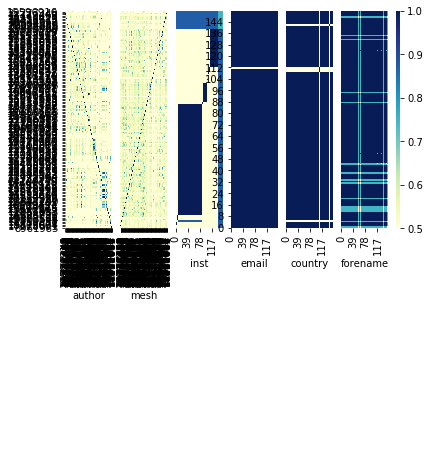

sim matrices shapes for author and mesh:
correlations:
            author      mesh      inst     email   country  forename
author    1.000000  0.668458  0.194412 -0.001239  0.033540  0.029134
mesh      0.668458  1.000000  0.148603 -0.012392  0.060592  0.005014
inst      0.194412  0.148603  1.000000  0.085371  0.080494  0.024267
email    -0.001239 -0.012392  0.085371  1.000000  0.433049 -0.027727
country   0.033540  0.060592  0.080494  0.433049  1.000000 -0.062001
forename  0.029134  0.005014  0.024267 -0.027727 -0.062001  1.000000
similarity statistics:
             author          mesh          inst         email       country  \
count  23104.000000  23104.000000  23104.000000  23104.000000  23104.000000   
mean       0.066669      0.098763      0.414928      0.986929      0.935769   
std        0.137346      0.122267      0.461155      0.113583      0.245170   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.023337      0.000

finished building country inst dict
found 1 publications
hit_df retrieved fields:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 13 columns):
authors                    1 non-null object
last_author_affiliation    1 non-null object
last_author_forename       1 non-null object
last_author_country        1 non-null object
last_author_email          1 non-null object
last_author_id             1 non-null object
last_author_inst           1 non-null object
last_author_inst_type      1 non-null object
last_author_name           1 non-null object
mesh                       1 non-null object
mesh_major                 1 non-null object
pmid                       1 non-null object
pub_year                   1 non-null int64
dtypes: int64(1), object(12)
memory usage: 184.0+ bytes
None
                                             authors  \
0  [{'forename': 'David A', 'affiliation': 'Divis...   

                             last_author_affiliation last_a

        pmid        last_author_email            email_clean
26  16263830                      NaN                       
25  22240107                      NaN                       
23  19961550                      NaN                       
38  21455123                      NaN                       
6   25557969                      NaN                       
27  20425582                      NaN                       
3   31241742                      NaN                       
24  29759973                      NaN                       
10  27225594                      NaN                       
13  27568473                      NaN                       
11  12679447                      NaN                       
31  18227817                      NaN                       
32  18827000                      NaN                       
33  24951252                      NaN                       
34  17584962                      NaN                       
41  20215429            

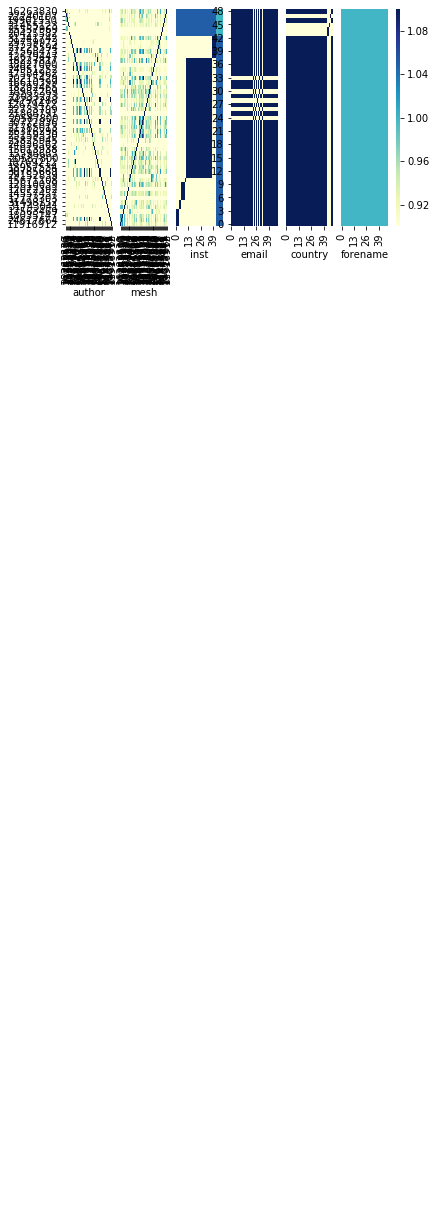

sim matrices shapes for author and mesh:
correlations:
            author      mesh      inst     email   country  forename
author    1.000000  0.593346  0.229020  0.148182  0.061321       NaN
mesh      0.593346  1.000000  0.134173 -0.029468  0.191597       NaN
inst      0.229020  0.134173  1.000000 -0.117409 -0.220367       NaN
email     0.148182 -0.029468 -0.117409  1.000000 -0.085983       NaN
country   0.061321  0.191597 -0.220367 -0.085983  1.000000       NaN
forename       NaN       NaN       NaN       NaN       NaN       NaN
similarity statistics:
            author         mesh         inst        email      country  \
count  2401.000000  2401.000000  2401.000000  2401.000000  2401.000000   
mean      0.076473     0.136933     0.498126     0.813411     0.845898   
std       0.204098     0.194585     0.453914     0.389662     0.361122   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000     1.00000

finished building country inst dict
found 1 publications
hit_df retrieved fields:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
authors                    1 non-null object
last_author_affiliation    1 non-null object
last_author_forename       1 non-null object
last_author_country        1 non-null object
last_author_email          1 non-null object
last_author_id             1 non-null object
last_author_inst           1 non-null object
last_author_inst_type      1 non-null object
last_author_name           1 non-null object
mesh                       1 non-null object
pmid                       1 non-null object
pub_year                   1 non-null int64
dtypes: int64(1), object(11)
memory usage: 176.0+ bytes
None
                                             authors  \
0  [{'forename': 'Al B', 'affiliation': 'Robert H...   

                             last_author_affiliation last_author_forename  \
0  Robert H. Lurie Comprehe

        pmid                last_author_email                    email_clean
53  20567570                              NaN                               
28  19352468                              NaN                               
41  18048821                              NaN                               
33  20117465                              NaN                               
66  11969242                              NaN                               
70  24627156                              NaN                               
34  18422373                              NaN                               
35  15807929                              NaN                               
37  29211295                              NaN                               
38  25926352                              NaN                               
40  23169502                              NaN                               
69  21999129                              NaN                               

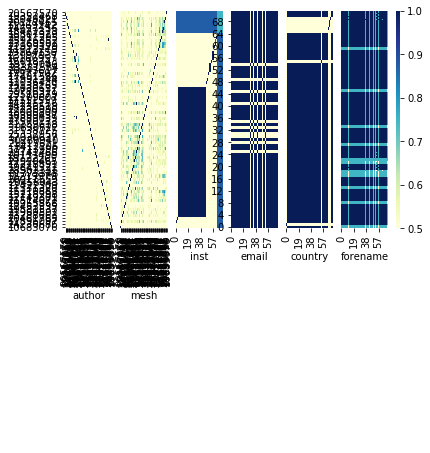

sim matrices shapes for author and mesh:
correlations:
            author      mesh      inst     email   country  forename
author    1.000000  0.661545  0.137408  0.076453  0.053564  0.028990
mesh      0.661545  1.000000  0.175867  0.028492  0.014314  0.039089
inst      0.137408  0.175867  1.000000 -0.038967 -0.040456  0.172557
email     0.076453  0.028492 -0.038967  1.000000 -0.105302  0.044131
country   0.053564  0.014314 -0.040456 -0.105302  1.000000 -0.132116
forename  0.028990  0.039089  0.172557  0.044131 -0.132116  1.000000
similarity statistics:
            author         mesh         inst        email      country  \
count  5184.000000  5184.000000  5184.000000  5184.000000  5184.000000   
mean      0.020571     0.079507     0.499904     0.757330     0.816744   
std       0.128779     0.154411     0.463349     0.428738     0.386914   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000932     0.000000     1.000000     1.00000

finished building country inst dict
found 1 publications
hit_df retrieved fields:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
authors                    1 non-null object
last_author_affiliation    1 non-null object
last_author_forename       1 non-null object
last_author_country        1 non-null object
last_author_id             1 non-null object
last_author_inst           1 non-null object
last_author_inst_type      1 non-null object
last_author_name           1 non-null object
mesh                       1 non-null object
mesh_major                 1 non-null object
pmid                       1 non-null object
pub_year                   1 non-null int64
dtypes: int64(1), object(11)
memory usage: 176.0+ bytes
None
                                             authors  \
0  [{'forename': 'P', 'affiliation': 'Department ...   

                             last_author_affiliation last_author_forename  \
0  Department of Pharmacolo

         pmid                       last_author_email  \
96   19393548                                     NaN   
114  16905676                                     NaN   
117  16429560                                     NaN   
80   31076377                                     NaN   
66   30501570                                     NaN   
135  29070512                                     NaN   
67   28972798                                     NaN   
79   24067248                                     NaN   
188  20131276                                     NaN   
72   21246297                                     NaN   
82   19191126                                     NaN   
85   18561208                                     NaN   
84   17490497                                     NaN   
1    26364831                                     NaN   
56   30821658                                     NaN   
175  23988546                                     NaN   
111  18325205                  

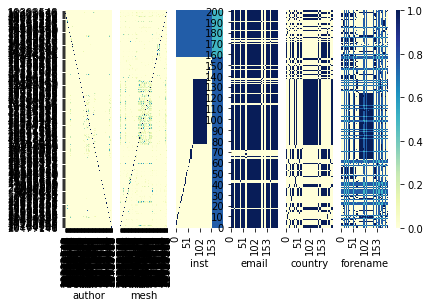

sim matrices shapes for author and mesh:
correlations:
            author      mesh      inst     email   country  forename
author    1.000000  0.825767  0.132462  0.049922  0.146269  0.136988
mesh      0.825767  1.000000  0.186883  0.054645  0.231258  0.206299
inst      0.132462  0.186883  1.000000  0.017543  0.293117  0.288857
email     0.049922  0.054645  0.017543  1.000000  0.004266  0.008275
country   0.146269  0.231258  0.293117  0.004266  1.000000  0.248508
forename  0.136988  0.206299  0.288857  0.008275  0.248508  1.000000
similarity statistics:
             author          mesh          inst         email       country  \
count  40401.000000  40401.000000  40401.000000  40401.000000  40401.000000   
mean       0.009029      0.018350      0.372256      0.760451      0.318482   
std        0.078511      0.086158      0.398976      0.426813      0.465893   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000

finished building country inst dict
found 1 publications
hit_df retrieved fields:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
authors                    1 non-null object
last_author_affiliation    1 non-null object
last_author_forename       1 non-null object
last_author_country        1 non-null object
last_author_id             1 non-null object
last_author_inst           1 non-null object
last_author_inst_type      1 non-null object
last_author_name           1 non-null object
mesh                       1 non-null object
mesh_major                 1 non-null object
pmid                       1 non-null object
pub_year                   1 non-null int64
dtypes: int64(1), object(11)
memory usage: 176.0+ bytes
None
                                             authors  \
0  [{'forename': 'Alexander', 'affiliation': 'Div...   

                             last_author_affiliation last_author_forename  \
0  Division of Gynecologic 

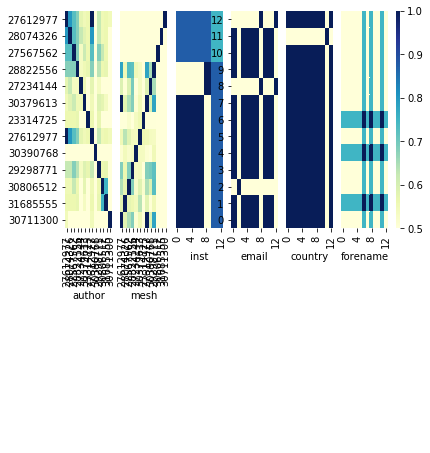

sim matrices shapes for author and mesh:
correlations:
            author      mesh      inst     email   country  forename
author    1.000000  0.872526  0.251968  0.320045  0.142821 -0.221671
mesh      0.872526  1.000000  0.046079  0.203626  0.244316 -0.150828
inst      0.251968  0.046079  1.000000  0.234942 -0.014633 -0.197650
email     0.320045  0.203626  0.234942  1.000000 -0.107943 -0.091341
country   0.142821  0.244316 -0.014633 -0.107943  1.000000 -0.481457
forename -0.221671 -0.150828 -0.197650 -0.091341 -0.481457  1.000000
similarity statistics:
           author        mesh        inst       email     country    forename
count  169.000000  169.000000  169.000000  169.000000  169.000000  169.000000
mean     0.213423    0.174982    0.695266    0.621302    0.857988    0.615385
std      0.285333    0.292249    0.364383    0.486504    0.350100    0.149404
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.500000
25%      0.000000    0.000000    0.750000    0.00

finished building country inst dict
found 1 publications
hit_df retrieved fields:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
authors                    1 non-null object
last_author_affiliation    1 non-null object
last_author_forename       1 non-null object
last_author_country        1 non-null object
last_author_id             1 non-null object
last_author_inst           1 non-null object
last_author_inst_type      1 non-null object
last_author_name           1 non-null object
mesh                       1 non-null object
mesh_major                 1 non-null object
pmid                       1 non-null object
pub_year                   1 non-null int64
dtypes: int64(1), object(11)
memory usage: 176.0+ bytes
None
                                             authors  \
0  [{'forename': 'Yan', 'affiliation': 'Departmen...   

                             last_author_affiliation last_author_forename  \
0  Departments of Respirato

         pmid             last_author_email                 email_clean
38   25723496                           NaN                            
61   28787921  [mg1325050@smail.nju.edu.cn]  mg1325050@smail.nju.edu.cn
62   27011528                           NaN                            
63   19907092      [yunalu_li@yahoo.com.cn]      yunalu_li@yahoo.com.cn
64   29493240                           NaN                            
153  28088529       [hkliyao@nankai.edu.cn]       hkliyao@nankai.edu.cn
152  29274574       [hkliyao@nankai.edu.cn]       hkliyao@nankai.edu.cn
149  28711820                           NaN                            
151  28629191       [liyun2009@nudt.edu.cn]       liyun2009@nudt.edu.cn
128  25956196                           NaN                            
126  28635032                           NaN                            
125  31017402                           NaN                            
127  28549733                           NaN                     

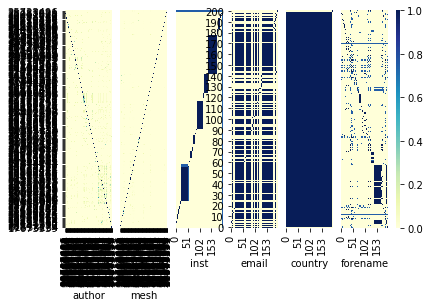

sim matrices shapes for author and mesh:
correlations:
            author      mesh      inst     email   country  forename
author    1.000000  0.876816  0.316996  0.097090  0.024682  0.336454
mesh      0.876816  1.000000  0.231610  0.075180  0.008645  0.235714
inst      0.316996  0.231610  1.000000  0.089623 -0.130832  0.389923
email     0.097090  0.075180  0.089623  1.000000  0.039885  0.090939
country   0.024682  0.008645 -0.130832  0.039885  1.000000  0.001581
forename  0.336454  0.235714  0.389923  0.090939  0.001581  1.000000
similarity statistics:
             author          mesh          inst         email       country  \
count  40401.000000  40401.000000  40401.000000  40401.000000  40401.000000   
mean       0.013838      0.007265      0.101446      0.488825      0.980248   
std        0.079588      0.072952      0.297825      0.499881      0.139149   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000

AttributeError: 'DataFrame' object has no attribute 'pmid'

In [20]:
author_list_path="/home/ubuntu/data/author_list.csv"
main(author_list_path)

In [ ]:
print(cluster_dfs[0].cluster.value_counts())

In [ ]:
out_path="/home/ubuntu/data/hecht_jr.csv"
#out_path="/home/ubuntu/data/gottlieb_pa.csv"
cluster_dfs[0].sort_values(["cluster"]).to_csv(out_path, index=False, columns=["pmid", "cluster", "last_author_inst", "last_author_forename","pub_year","last_author_name"])

In [ ]:
# cur_clusters=cluster_dfs[0]
# print(cur_clusters.info())
# print(cur_clusters.cluster.value_counts())
# cur_clusters.to_csv("/home/ubuntu/data/friedman_n.csv", index=False)

In [ ]:
# cur_clusters=cluster_dfs[0][["pmid", "last_author_id", "last_author_inst", 
#                              "last_author_country", "last_author_name",
#                              "last_author_forename", "cluster",
#                             "pub_year", "last_author_affiliation"]].sort_values(["cluster"])
# print(cur_clusters)

In [ ]:
# cm = 'tab20b'
# cur_clusters=cluster_dfs[20][["cluster","pmid","last_author_inst",  "last_author_forename",
#                              "mesh_clean", "other_authors", "last_author_country", "last_author_name"]].reset_index()
# cur_clusters.sort_values('cluster').style.background_gradient(cmap=cm, subset=['cluster']).set_caption('Clustering output')

In [ ]:
def forename_delta(n1, n2):
        if ' ' in n1:
            n1=n1.split()[0]
        if ' ' in n2:
            n2=n2.split()[0]
        if n1==n2:
            if len(n1)>1:
                return 1.0
            else:
                return 0.5
        elif n1 in n2 or n2 in n1:
            return 0.75
        else:
            return 0.0

In [ ]:
forename_delta("Peter A","P A")